We import our libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
from sqlalchemy import create_engine
import json

Connection to our database

In [37]:
def create_connection():
    try:
        with open('../credentials.json') as f:
            credentials = json.load(f)
        
        user = credentials['user']
        password = credentials['password']
        host = credentials['host']
        port = credentials['port']
        database = 'workshop_01'
        
        connection = psycopg2.connect(
            dbname=database,
            user=user,
            password=password,
            host=host,
            port=port
        )
        print("¡Conexión exitosa!")
        return connection
    except psycopg2.OperationalError as e:
        print(f"Error al conectar a la base de datos: {e}")
        return None

# Establish the connection
connection = create_connection()

# Load data from the PostgreSQL table into a pandas DataFrame
query = "SELECT * FROM workshop_01"
df = pd.read_sql(query, connection)

# Display the first few rows of the DataFrame
df.head()

¡Conexión exitosa!


C:\Users\USER\AppData\Local\Temp\ipykernel_11700\1601435646.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, connection)


,first_name,last_name,email,country,application_date,yoe,seniority,technology,code_challenge_score,technical_interview
0,Bernadette,Langworth,leonard91@yahoo.com,Norway,2021-02-26,2,Intern,Data Engineer,3.0,3
1,Camryn,Reynolds,zelda56@hotmail.com,Panama,2021-09-09,10,Intern,Data Engineer,2.0,10
2,Larue,Spinka,okey_schultz41@gmail.com,Belarus,2020-04-14,4,Mid-Level,Client Success,10.0,9
3,Arch,Spinka,elvera_kulas@yahoo.com,Eritrea,2020-10-01,25,Trainee,QA Manual,7.0,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,Myanmar,2020-05-20,13,Mid-Level,Social Media Community Management,9.0,7


# **Initial Data Analysis**
Let's begin with a quick overview of the dataset to understand its structure. We will check the number of columns and rows, and inspect the data types and null values.

In [13]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

df.info()

The dataset contains 50000 rows and 10 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   first_name            50000 non-null  object 
 1   last_name             50000 non-null  object 
 2   email                 50000 non-null  object 
 3   country               50000 non-null  object 
 4   application_date      50000 non-null  object 
 5   yoe                   50000 non-null  int64  
 6   seniority             50000 non-null  object 
 7   technology            50000 non-null  object 
 8   code_challenge_score  50000 non-null  float64
 9   technical_interview   50000 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.8+ MB


# **Descriptive Statistics**
We will now generate descriptive statistics to get an understanding of the distribution of numerical values, such as years of experience, code challenge scores, and technical interview scores.

In [14]:
df.describe()

,yoe,code_challenge_score
count,50000.000000,50000.000000
mean,15.286980,4.996400
std,8.830652,3.166896
min,0.000000,0.000000
25%,8.000000,2.000000
50%,15.000000,5.000000
75%,23.000000,8.000000
max,30.000000,10.000000


# **Analysis of Unique and Missing Values**
We will check for unique values in categorical columns and identify any missing data that needs to be handled.

In [15]:
for col in ['first_name', 'last_name', 'email', 'country', 'seniority', 'technology']:
    print(f'{col}: {df[col].nunique()} unique values')

df.isnull().sum()

first_name: 3007 unique values
last_name: 474 unique values
email: 49833 unique values
country: 244 unique values
seniority: 7 unique values
technology: 24 unique values


first_name              0
last_name               0
email                   0
country                 0
application_date        0
yoe                     0
seniority               0
technology              0
code_challenge_score    0
technical_interview     0
dtype: int64

# Duplicate Rows Detection
Removing duplicate records ensures data quality and consistency.

In [22]:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

Number of duplicate rows: 0


# Numerical Variables Distribution
Visualizing the distribution helps in understanding the spread and identifying outliers.

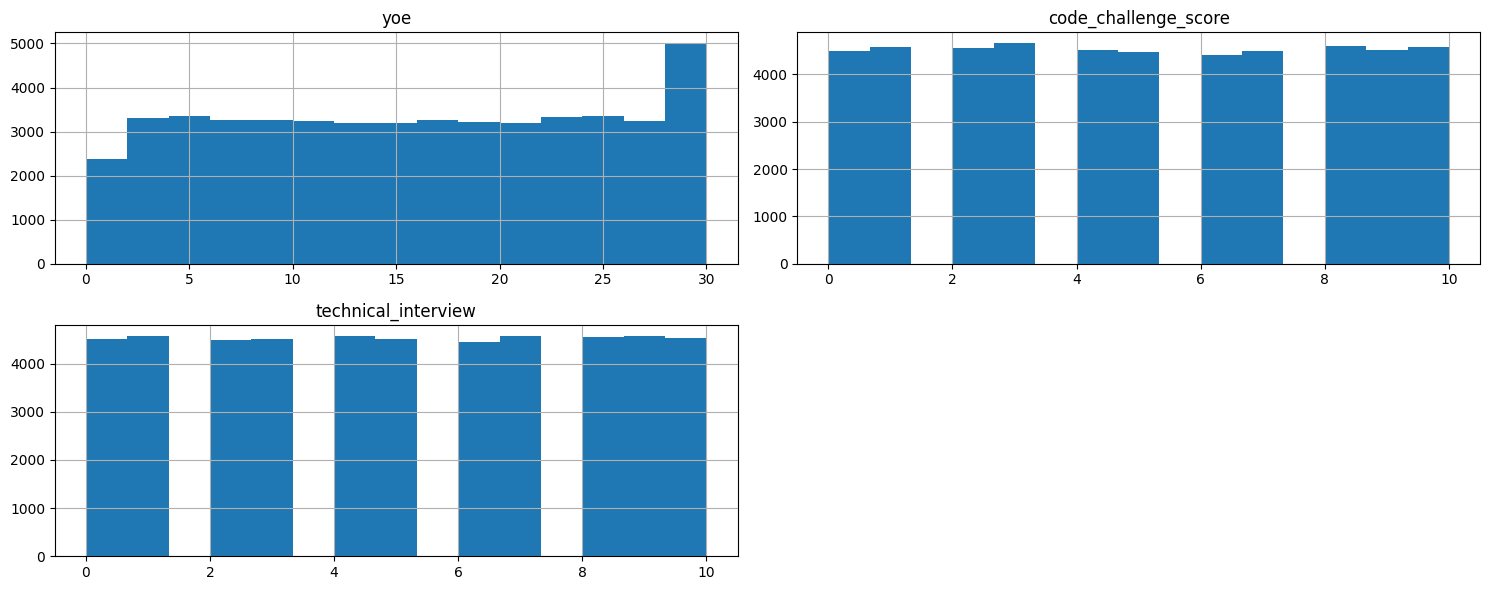

In [23]:
numerical_columns = ['yoe', 'code_challenge_score', 'technical_interview']
df[numerical_columns].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.tight_layout()
plt.show()

# Categorical Variables Distribution
Analyzing the frequency of categorical data gives insights into common characteristics.

C:\Users\USER\AppData\Local\Temp\ipykernel_11700\1719089298.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='seniority', palette='Set2')


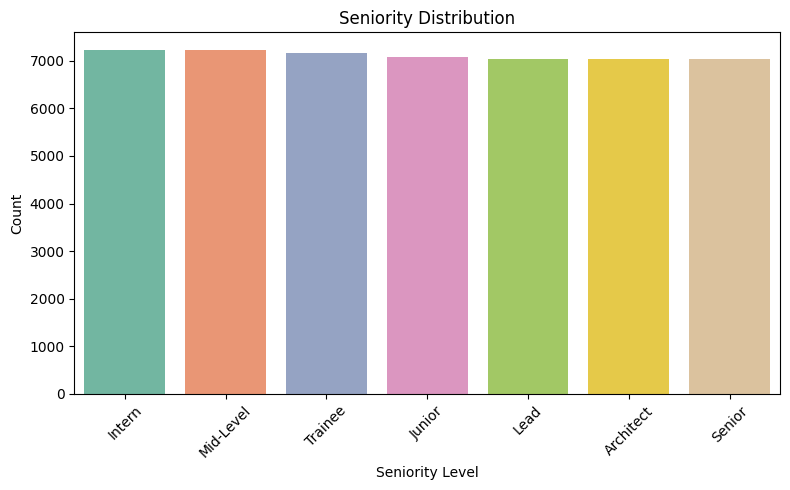

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# seniority
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='seniority', palette='Set2')
plt.title('Seniority Distribution')
plt.xlabel('Seniority Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_11700\2455272449.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='technology', palette='Set3', order=df['technology'].value_counts().index)


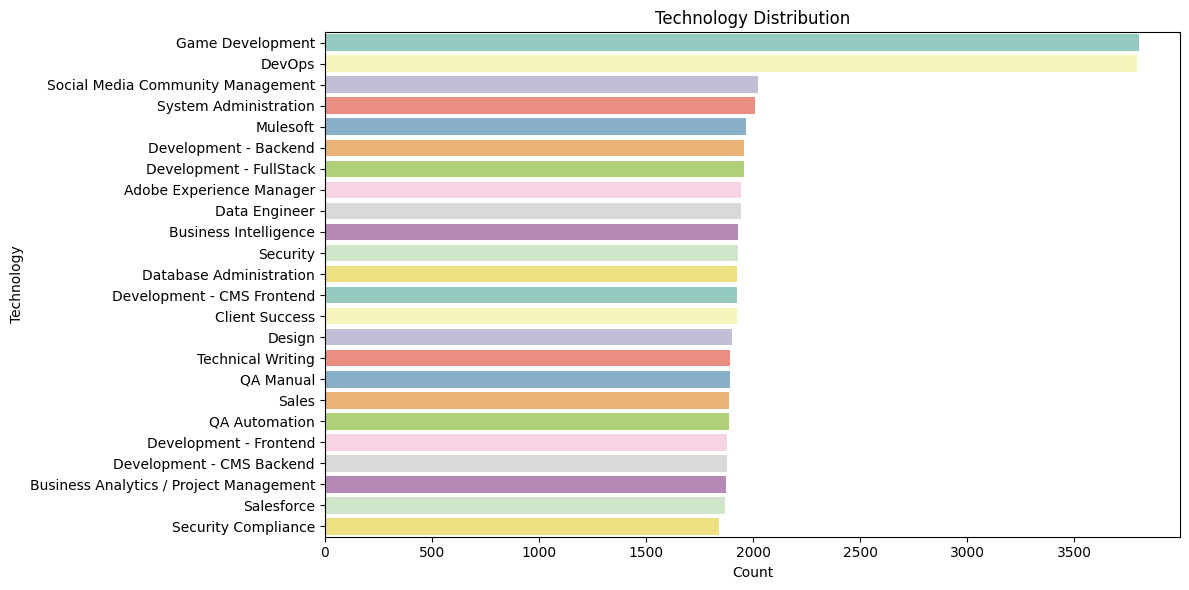

In [28]:
# technology
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='technology', palette='Set3', order=df['technology'].value_counts().index)
plt.title('Technology Distribution')
plt.xlabel('Count')
plt.ylabel('Technology')
plt.tight_layout()
plt.show()

# Correlation Analysis
Understanding relationships between numerical variables can help in feature selection.

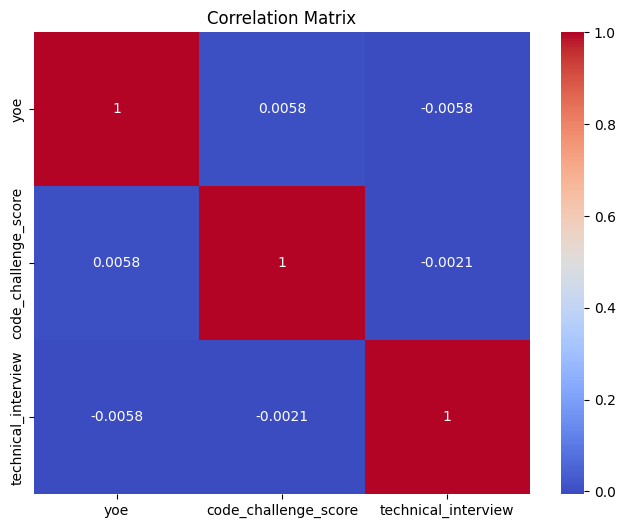

In [25]:
# Mapa de calor de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Top 10 Country Distribution Visualization**
To improve the readability of the country distribution, we will focus on the top 10 countries with the most candidates. This will give us a clearer picture of where the majority of the candidates are coming from.

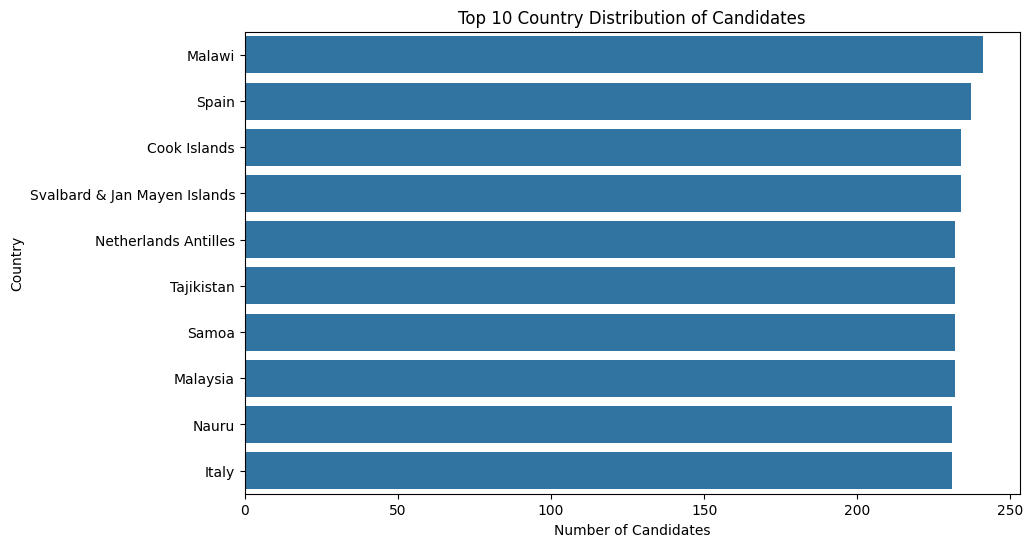

In [20]:
top_10_countries = df['country'].value_counts().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_10_countries.index, x=top_10_countries.values)
plt.title('Top 10 Country Distribution of Candidates')
plt.xlabel('Number of Candidates')
plt.ylabel('Country')
plt.show()

# **Years of Experience Visualization**
Visualizing the distribution of years of experience among the candidates.

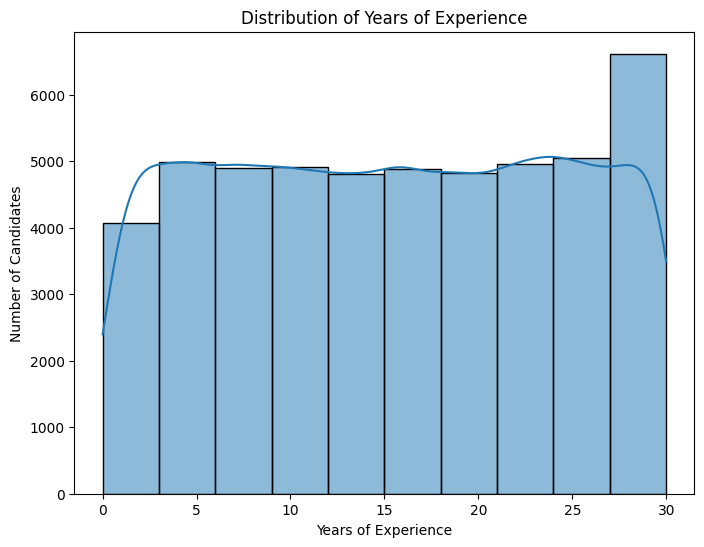

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['yoe'], bins=10, kde=True)
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Number of Candidates')
plt.show()

# **Hired Candidates Identification**
A candidate is considered hired if both their code challenge score and technical interview score are greater than or equal to 7. Let's apply this logic to filter out the hired candidates.

In [21]:
df['code_challenge_score'] = pd.to_numeric(df['code_challenge_score'], errors='coerce')
df['technical_interview'] = pd.to_numeric(df['technical_interview'], errors='coerce')

df['hired'] = np.where((df['code_challenge_score'] >= 7) & (df['technical_interview'] >= 7), 'Yes', 'No')

print(f'Number of hired candidates: {df[df["hired"] == "Yes"].shape[0]}')

Number of hired candidates: 6678


# **Data Cleaning**
Handling missing values, duplicates, and incorrect data types to ensure data quality before further analysis.

In [19]:
df['yoe'].fillna(df['yoe'].median(), inplace=True)

df.drop_duplicates(subset=['email'], inplace=True)

df['application_date'] = pd.to_datetime(df['application_date'])

df.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_11700\526752723.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['yoe'].fillna(df['yoe'].median(), inplace=True)


,first_name,last_name,email,country,application_date,yoe,seniority,technology,code_challenge_score,technical_interview
0,Bernadette,Langworth,leonard91@yahoo.com,Norway,2021-02-26,2,Intern,Data Engineer,3.0,3
1,Camryn,Reynolds,zelda56@hotmail.com,Panama,2021-09-09,10,Intern,Data Engineer,2.0,10
2,Larue,Spinka,okey_schultz41@gmail.com,Belarus,2020-04-14,4,Mid-Level,Client Success,10.0,9
3,Arch,Spinka,elvera_kulas@yahoo.com,Eritrea,2020-10-01,25,Trainee,QA Manual,7.0,1
4,Larue,Altenwerth,minnie.gislason@gmail.com,Myanmar,2020-05-20,13,Mid-Level,Social Media Community Management,9.0,7


Before exporting, we need to handle missing values, outliers, and ensure consistency.

# Exporting Cleaned Data to PostgreSQL
Create a new table to store the cleaned dataset, which will be used for further analysis and reporting in Power BI.

In [49]:

df['application_date'] = pd.to_datetime(df['application_date'], format='%d/%m/%Y')

# b. Normalizar nombres de columnas
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

# c. Convertir columnas a tipos numéricos, manejando errores
df['yoe'] = pd.to_numeric(df['yoe'], errors='coerce')
df['code_challenge_score'] = pd.to_numeric(df['code_challenge_score'], errors='coerce')
df['technical_interview'] = pd.to_numeric(df['technical_interview'], errors='coerce')

# d. Eliminar filas con valores faltantes en columnas críticas
df.dropna(subset=['yoe', 'code_challenge_score', 'technical_interview'], inplace=True)

# e. Normalizar texto en la columna 'country'
df['country'] = df['country'].str.strip().str.title()

# f. Añadir columna de fecha de procesamiento
df['date_of_processing'] = pd.Timestamp.now()

# 3. Verificar el DataFrame procesado
print("DataFrame processed:")
print(df.head())
print(df.dtypes)

# 4. Exportar el DataFrame a PostgreSQL

# a. Cargar credenciales desde el archivo
with open('../credentials.json') as f:
    credentials = json.load(f)

user = credentials['user']
password = credentials['password']
host = credentials['host']
port = credentials['port']
database = 'workshop_01'

# b. Crear cadena de conexión
connection_string = f'postgresql+psycopg2://{user}:{password}@{host}:{port}/{database}'
engine = create_engine(connection_string)

# c. Exportar el DataFrame a la tabla 'workshop_eda'
df.to_sql('workshop_eda', engine, if_exists='replace', index=False)
print("Data successfully exported to 'workshop_eda' table in PostgreSQL.")

DataFrame processed:
   first_name   last_name                      email  country  \
0  Bernadette   Langworth        leonard91@yahoo.com   Norway   
1      Camryn    Reynolds        zelda56@hotmail.com   Panama   
2       Larue      Spinka   okey_schultz41@gmail.com  Belarus   
3        Arch      Spinka     elvera_kulas@yahoo.com  Eritrea   
4       Larue  Altenwerth  minnie.gislason@gmail.com  Myanmar   

  application_date  yoe  seniority                         technology  \
0       2021-02-26    2     Intern                      Data Engineer   
1       2021-09-09   10     Intern                      Data Engineer   
2       2020-04-14    4  Mid-Level                     Client Success   
3       2020-10-01   25    Trainee                          QA Manual   
4       2020-05-20   13  Mid-Level  Social Media Community Management   

   code_challenge_score  technical_interview         date_of_processing  
0                   3.0                    3 2024-08-26 17:58:19.926927  
1

I show the first 5 results from our new and clean table "workshop_EDA"

In [50]:
def mostrar_primeros_resultados(tabla, num_filas=3):
    connection = create_connection()
    if connection is not None:
        try:
            cursor = connection.cursor()
            query = f"SELECT * FROM {tabla} LIMIT %s;"
            cursor.execute(query, (num_filas,))
            resultados = cursor.fetchall()
            
            column_names = [desc[0] for desc in cursor.description]
            print(f"Resultados de la tabla '{tabla}':")
            print(f"{' | '.join(column_names)}")
            for fila in resultados:
                print(fila)
        except (Exception, psycopg2.DatabaseError) as error:
            print(f"Error al mostrar resultados: {error}")
        finally:
            cursor.close()
            connection.close()
    else:
        print("No se pudo establecer la conexión con la base de datos.")

mostrar_primeros_resultados('workshop_eda')

¡Conexión exitosa!
Resultados de la tabla 'workshop_eda':
first_name | last_name | email | country | application_date | yoe | seniority | technology | code_challenge_score | technical_interview | date_of_processing
('Bernadette', 'Langworth', 'leonard91@yahoo.com', 'Norway', datetime.datetime(2021, 2, 26, 0, 0), 2, 'Intern', 'Data Engineer', 3.0, 3, datetime.datetime(2024, 8, 26, 17, 58, 19, 926927))
('Camryn', 'Reynolds', 'zelda56@hotmail.com', 'Panama', datetime.datetime(2021, 9, 9, 0, 0), 10, 'Intern', 'Data Engineer', 2.0, 10, datetime.datetime(2024, 8, 26, 17, 58, 19, 926927))
('Larue', 'Spinka', 'okey_schultz41@gmail.com', 'Belarus', datetime.datetime(2020, 4, 14, 0, 0), 4, 'Mid-Level', 'Client Success', 10.0, 9, datetime.datetime(2024, 8, 26, 17, 58, 19, 926927))
